In [ ]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *

data_DIR = "../data/misc/"
fig_DIR = "../figs/analysis/"

pID_dict = get_pID_pbp() 

## OCR

In [ ]:
# import easyocr

# # Create an OCR reader object
# reader = easyocr.Reader(['en'])

# # Read text from an image
# res1  = reader.readtext(data_DIR + 'NBA_All_Star_Voting_1_2025.jpg',detail=0, paragraph=True)

## Data

In [164]:
df1 = pd.read_csv(data_DIR + "NBA_All_Star_Voting_1_2025.csv")
df2 = pd.read_csv(data_DIR + "NBA_All_Star_Voting_2_2025.csv")

In [165]:
df31 = pd.merge(df1,df2,on=["Player","Conference","Position","Team"],how="left",suffixes=["_1","_2"])
df32 = pd.merge(df2,df1,on=["Player","Conference","Position","Team"],how="left",suffixes=["_2","_1"])
df3 = pd.concat([df31,df32])
df3 = df3.fillna(0)
df3 = df3.drop_duplicates().reset_index(drop=True)

In [166]:
df3g = df3.groupby(["Conference","Position"])
keys = list(df3g.groups)
dfa = []
for key in keys:
    df4 = df3g.get_group(key)
    df4["Rank_1"] = df4["Votes_1"].rank(ascending=False)
    df4["Rank_2"] = df4["Votes_2"].rank(ascending=False)
    dfa.append(df4)
df5 = pd.concat(dfa).reset_index(drop=True)

In [167]:
data = df5

In [168]:
from plotnine import theme_classic

c:\Users\pansr\AppData\Local\pypoetry\Cache\virtualenvs\dav-ub9Z_EQq-py3.12\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_text : Removed 1 rows containing missing values.
c:\Users\pansr\AppData\Local\pypoetry\Cache\virtualenvs\dav-ub9Z_EQq-py3.12\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_text : Removed 1 rows containing missing values.
c:\Users\pansr\AppData\Local\pypoetry\Cache\virtualenvs\dav-ub9Z_EQq-py3.12\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_segment : Removed 2 rows containing missing values.


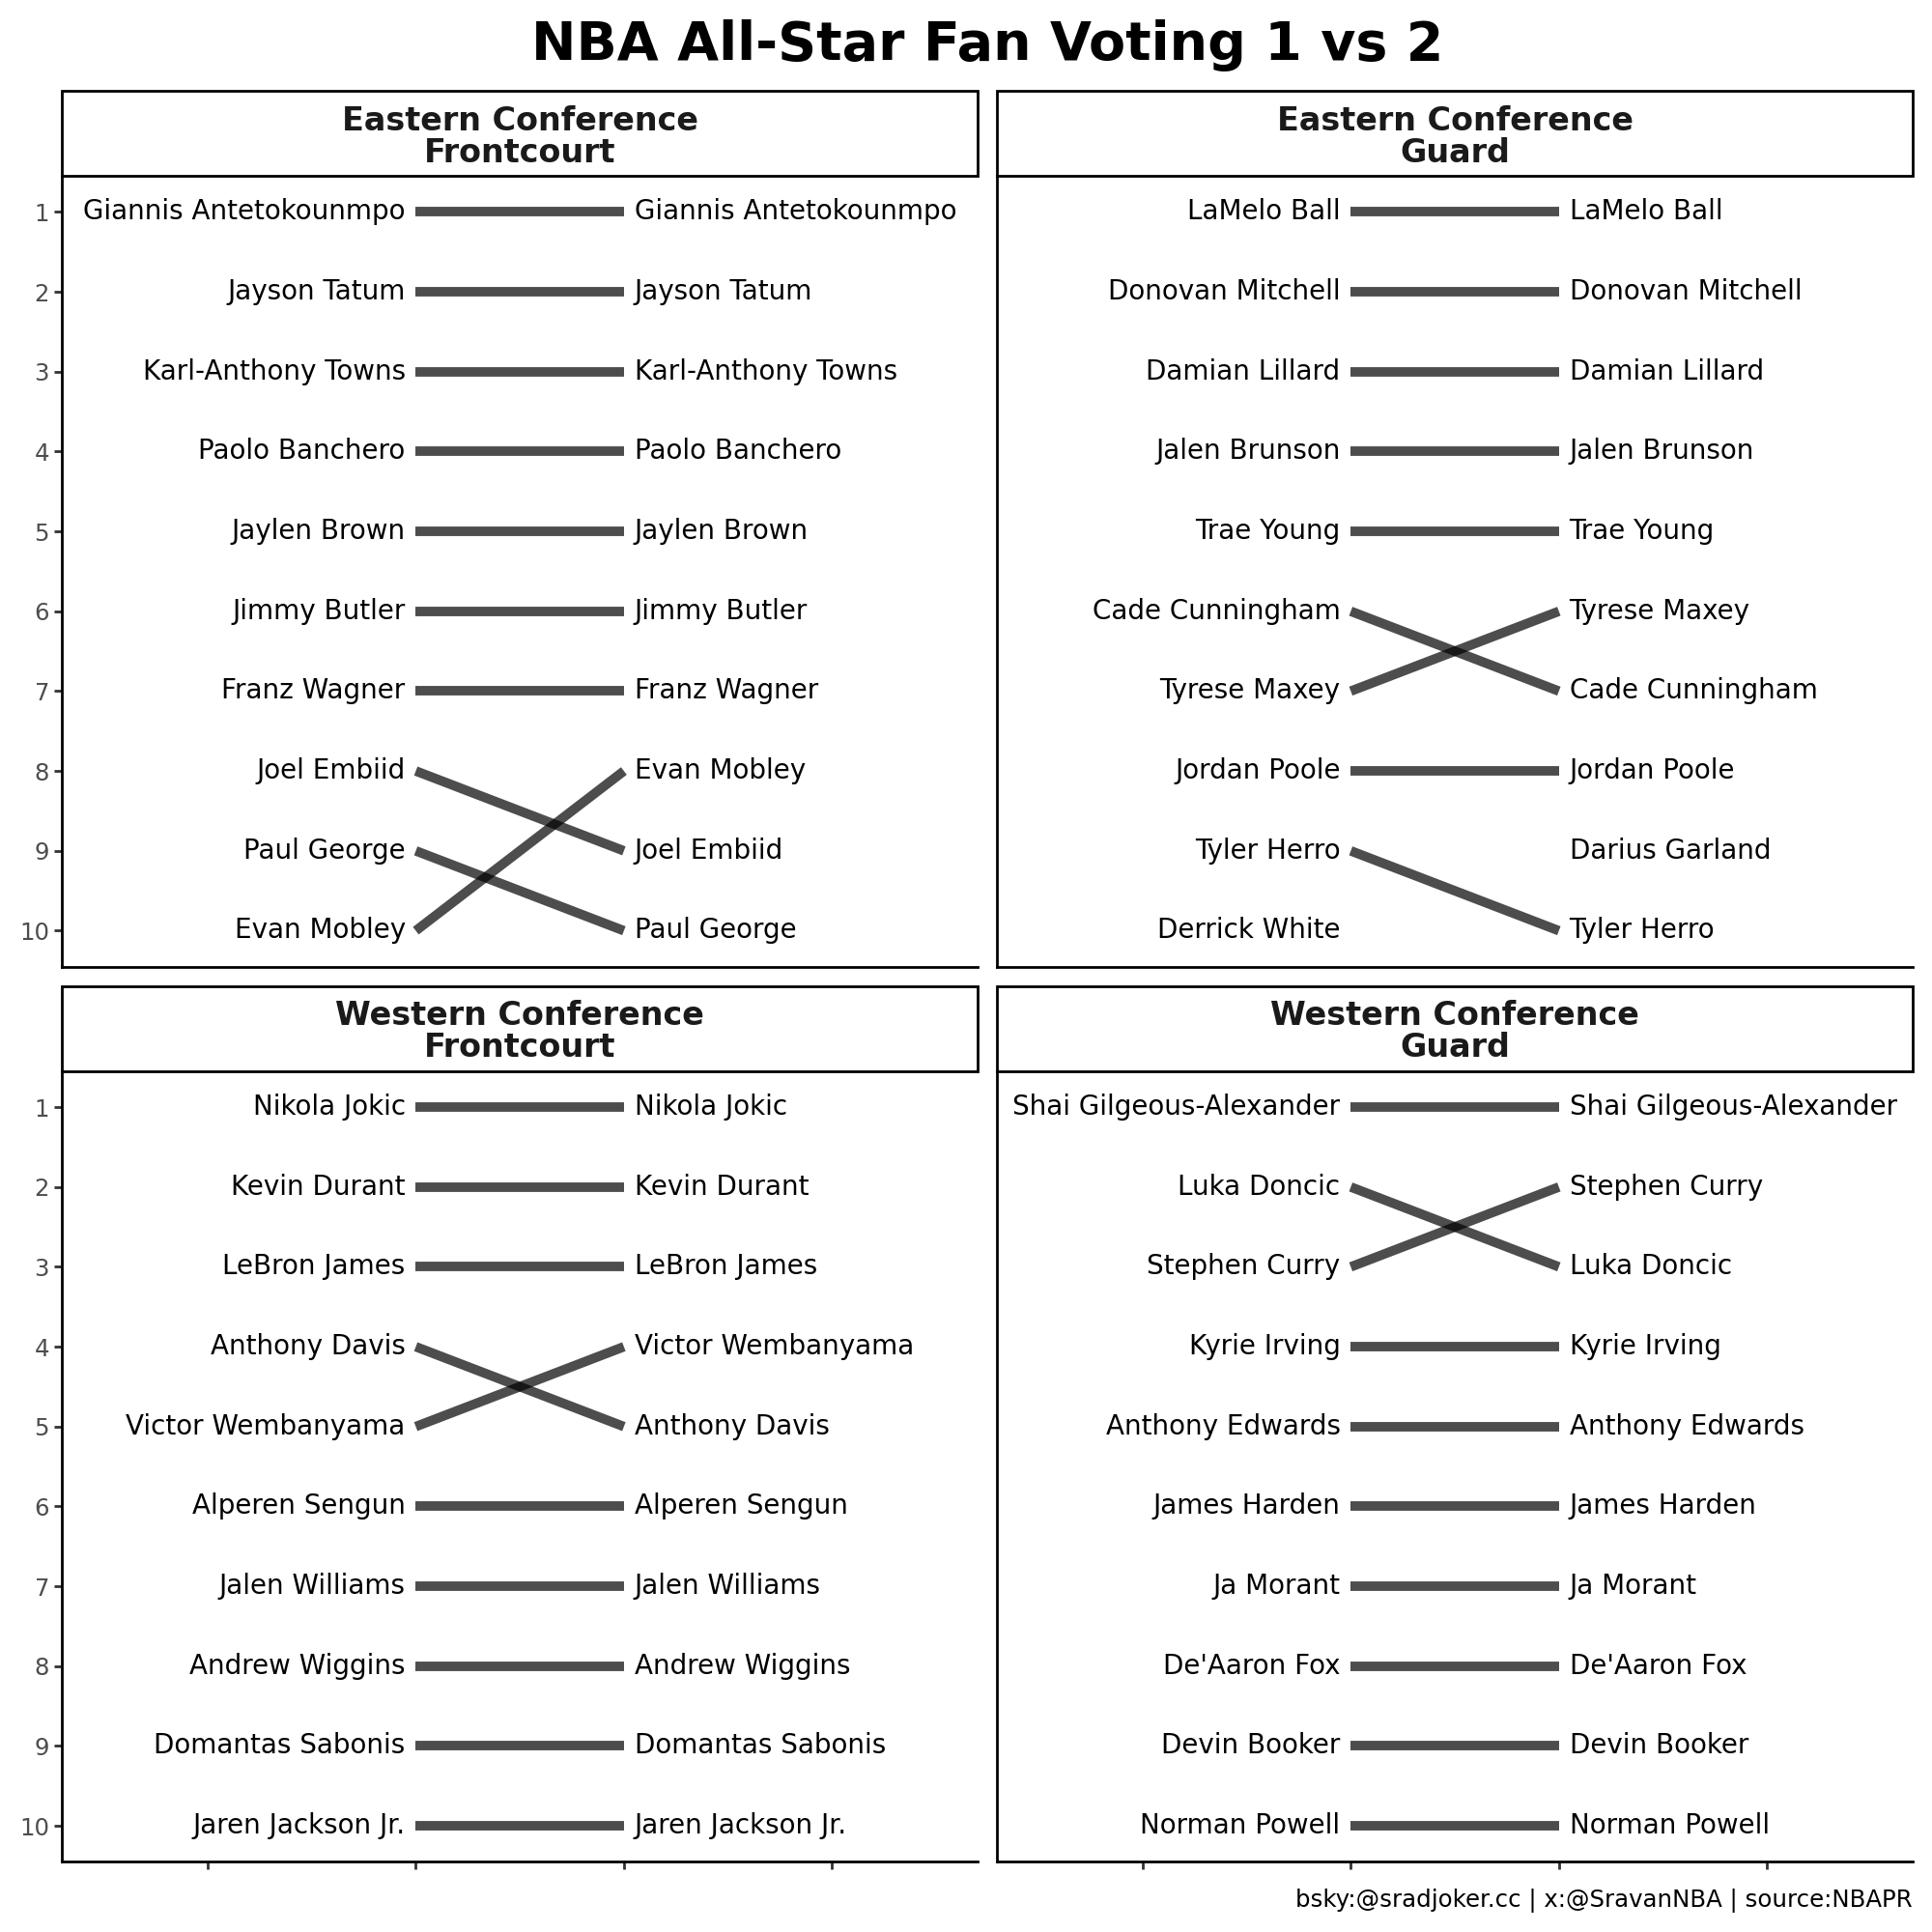

In [173]:
p = (
    ggplot(data)
    + geom_text(aes(1, 'Rank_1', label='Player' ), nudge_x=-0.05, ha='right', size=10)
    + geom_text(aes(2, 'Rank_2', label='Player' ), nudge_x=0.05, ha='left', size=10)
    + geom_segment(aes(x=1, y='Rank_1', xend=2, yend='Rank_2'), alpha=.7, size=2)
    + theme_classic()
    + scale_y_reverse(breaks=np.arange(1,11,1),limits=(1,10))
    # + scale_y_reverse(breaks=np.arange(1,11,1))
    + facet_wrap(["Conference","Position"])
    + coord_cartesian(xlim=[-0.5,3.5])
    + theme(
        figure_size=(10,10),
        axis_title_x = element_blank(),
        axis_title_y = element_blank(),
        axis_text_x = element_blank(),
        plot_title=element_text(face="bold", size=20),
        strip_text=element_text(face="bold", size=12),
    )
    + labs(
            title=f"NBA All-Star Fan Voting 1 vs 2",
            # subtitle = "Last 10 games only",
            caption="bsky:@sradjoker.cc | x:@SravanNBA | source:NBAPR",
            # y=f"Off Rating",
    )
)
p

In [170]:
dafasd

NameError: name 'dafasd' is not defined

In [ ]:
black1 = '#252525'
black2 = '#222222'

In [ ]:
p = (ggplot(data)
 # Slight modifications for the original lines,
 # 1. Nudge the text to either sides of the points
 # 2. Alter the color and alpha values
 + geom_text(aes(1, 'Voting 1', label='Team' ), nudge_x=-0.05, ha='right', size=10, color=black1)
 + geom_text(aes(2, 'Voting 2', label='Team'), nudge_x=0.05, ha='left', size=10, color=black1)
 + geom_point(aes(1, 'Voting 1', color='colorsTeam'), size=2.5, alpha=.7)
 + geom_point(aes(2, 'Voting 2', color='colorsTeam'), size=2.5, alpha=.7)
 + geom_segment(aes(x=1, y='OFF_R', xend=2, yend='aOFF_R', color='colorsTeam'), alpha=.7, size=2)

 # Text Annotations
 #+ annotate('text', x=1, y=0, label='Rank in 1960', fontweight='bold', ha='right', size=10, color=black2)
 #+ annotate('text', x=2, y=0, label='Rank in 2015', fontweight='bold', ha='left', size=10, color=black2)
#  + annotate('text', x=1.5, y=0, label='Lines show change in rank', size=11, color=black1)
 + annotate('text', x=0.8, y=0, label='Unadjusted Off Rating Rank', size=11, color=black1)
 + annotate('text', x=2.2, y=0, label='SoS Adjusted Off Rating Rank', size=11, color=black1)
 #+ annotate('label', x=1.5, y=3, label='Lower infant\ndeath rates', size=9, color=black1,
 #           label_size=0, fontstyle='italic')
 #+ annotate('label', x=1.5, y=33, label='Higher infant\ndeath rates', size=9, color=black1,
 #           label_size=0, fontstyle='italic')

 # Prevent country names from being chopped off
 + lims(x=(0.35, 2.65))
#  + labs(color='Income Group')
 # Countries with lower rates on top
 + scale_y_reverse(breaks=np.arange(1,31,1))
 # Change colors
 + scale_color_identity(aesthetics=["color"])
 # Removes all decorations
 + theme_idv
 # Changing the figure size prevents the country names from squishing up
 + theme(figure_size=(8, 11))
 + theme(
     axis_title_x = element_blank(),
     axis_text_x = element_blank(),
     plot_title=element_text(face="bold", size=20),
 )
 + labs(
        title=f"Unadjusted vs SoS Adjusted Off Ratings",
        # subtitle = "Last 10 games only",
        caption="@SravanNBA | source:nba.com/stats",
        y=f"Off Rating",
 )
)
p.save("../figs/teams/Teams_aOFF_mvmt.png", dpi=300, verbose = False)
p

NameError: name 'black1' is not defined